Topic:        Challenge Set 8

Subject:      Classification Errors

Date:         02/05/2018

Name:         Will Stokvis

Worked with:  Matias Beeck, Audrey Baker, Brad Davies, Kevin Stern

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Challenge 1

In [4]:
columns = ['party','handicapped-infants','water-project-cost-sharing', 'adoption-of-the-budget-resolution',\
          'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',\
          'aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',\
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']

In [48]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',\
                names = columns)

In [49]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [56]:
df = df.replace('y',1)
df = df.replace('n',0)

In [57]:
df.apply(lambda x: x.replace('?', np.nan,axis=1, inplace = True));
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.astype(float))
df.replace(np.nan, df.mean(), inplace = True)

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [58]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, 1:]
y = df['party']
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 4444)

In [63]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(x_test)))
print(classification_report(y_test, model.predict(x_test)))

Accuracy: 0.939
             precision    recall  f1-score   support

   democrat       0.92      0.99      0.95        77
 republican       0.98      0.87      0.92        54

avg / total       0.94      0.94      0.94       131



In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(x_test)))
print(classification_report(y_test, model.predict(x_test)))

Accuracy: 0.939
             precision    recall  f1-score   support

   democrat       0.93      0.97      0.95        77
 republican       0.96      0.89      0.92        54

avg / total       0.94      0.94      0.94       131



In [66]:
from sklearn.svm import SVC
svc = SVC()
model_svc = svc.fit(X_train, Y_train)
svc_pred = model_svc.predict(x_test)
print("Accuracy: %.3f"% accuracy_score(y_test, model_svc.predict(x_test)))
print(classification_report(y_test, model_svc.predict(x_test)))

Accuracy: 0.954
             precision    recall  f1-score   support

   democrat       0.95      0.97      0.96        77
 republican       0.96      0.93      0.94        54

avg / total       0.95      0.95      0.95       131



In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train, Y_train)
dtc_pred = model_dtc.predict(x_test)
print("Accuracy: %.3f"% accuracy_score(y_test, model_dtc.predict(x_test)))
print(classification_report(y_test, model_dtc.predict(x_test)))

Accuracy: 0.947
             precision    recall  f1-score   support

   democrat       0.95      0.96      0.95        77
 republican       0.94      0.93      0.93        54

avg / total       0.95      0.95      0.95       131



In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train, Y_train)
rfc_pred = model_rfc.predict(x_test)
print("Accuracy: %.3f"% accuracy_score(y_test, model_rfc.predict(x_test)))
print(classification_report(y_test, model_rfc.predict(x_test)))

Accuracy: 0.931
             precision    recall  f1-score   support

   democrat       0.91      0.97      0.94        77
 republican       0.96      0.87      0.91        54

avg / total       0.93      0.93      0.93       131



#### Challenge 2

In [76]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split


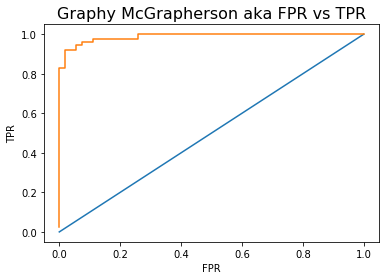

In [82]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=4444)

ytrain = ytrain.apply(lambda x: 1 if x == 'democrat' else 0)
ytest = ytest.apply(lambda x: 1 if x == 'democrat' else 0)

log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,1]

fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Graphy McGrapherson aka FPR vs TPR', fontsize = 16);